# 斯坦福 EE364a 凸优化笔记 - 第一部分：核心理论 (L1-L4)

教材: Convex Optimization by Boyd & Vandenberghe 核心目标: 识别、表述并求解凸优化问题。


## Lecture 1: Introduction

### 1.1 优化问题的标准形式
$$\begin{aligned}
& \text{minimize} && f_0(x) \\
& \text{subject to} && f_i(x) \le b_i, \quad i=1, \dots, m
\end{aligned}$$

其中：
- $x \in \mathbb{R}^n$ 是优化变量。
- $f_0: \mathbb{R}^n \to \mathbb{R}$ 是目标函数 (objective function)。
- $f_i: \mathbb{R}^n \to \mathbb{R}$ 是约束函数 (constraint functions)。

### 1.2 为什么要学凸优化？

- 线性规划 (LP) 和 最小二乘 (LS): 它们是凸优化的特例，拥有成熟的解析解或高效算法。

- 凸优化的地位: 它是除了线性规划和最小二乘之外，唯一一类我们可以有效、可靠地求解（solve efficiently and reliably）的非线性问题。

- 核心理念: 在实际工程中，如果能把一个问题建模为凸优化问题，那么这问题基本就被“解决”了。


## Lecture 2: Convex Set

核心目标: 所有的优化问题都在定义域内求解。本节课的目标是掌握如何定义、识别和构建“凸集”，并理解在向量空间中如何进行“大小比较”。

### 2.1 基础定义：几何形状的三种境界
- **仿射集 (Affine Set):**
    - **定义**: 包含经过集合中任意两点的**直线**（无限延伸）。即若 $x, y \in C$，则 $\theta x + (1-\theta)y \in C, \forall \theta \in \mathbb{R}$。
    - 直观: 这个集合是“平”且无限延伸的。
    - 例子: 直线、平面、超平面、$Ax=b$ 的解集。

- **凸集 (Convex Set):**
    - **定义**: 包含经过集合中任意两点的**线段**（有限长度）。即若 $x, y \in C$，则 $\theta x + (1-\theta)y \in C$，其中 $0 \le \theta \le 1$。
    - 直观: 集合是“实心”的，边缘没有凹陷。无法找到两点，使它们的连线穿过集合外部。
    - 例子: 立方体、球体、多面体。

- **锥 (Cone):**
    - **定义**: 包含从原点出发的射线。若 $x \in C$，则 $\theta x \in C, \forall \theta \ge 0$。
    - 凸锥 (Convex Cone): 既是锥又是凸集（例如：第一象限）。

### 2.2 重要的凸集例子
- 超平面 (Hyperplane): $\{x \mid a^T x = b\}$。既是仿射集也是凸集。
- 半空间 (Halfspace): $\{x \mid a^T x \le b\}$。是凸集但不是仿射集。
    - 注: 线性规划的约束就是半空间。
- 多面体 (Polyhedra): 有限个半空间和超平面的交集。表示为 $\{x \mid Ax \preceq b, Cx = d\}$。
- 半正定锥 (PSD Cone, $S^n_+$): 所有对称半正定矩阵构成的集合。这是半正定规划 (SDP) 的基础，也是现代控制论和信号处理的核心。

### 2.3 保持凸性的运算
这是证明一个复杂集合是凸集的关键方法（积木思维）。

#### 2.3.1 交集 (Intersection)
- 规则: 任意多个凸集的交集仍是凸集。

- 深度理解: “交集”是在做减法，范围越切越小。既然原来的形状没有凹陷，切出来的公共区域也不会有。

- 应用: 每一个约束条件定义一个凸集。同时满足多个约束，就是求它们的交集。

#### 2.3.2 仿射函数 (Affine function)
$$f(x) = Ax + b$$
- 核心性质: 线性变换（旋转、缩放）+ 平移。它保持直线仍然是直线。
- 两种应用:像 (Image) 保凸: 凸集 $S$ 经过变换后的形状 $f(S)$ 是凸的。原像 (Inverse Image) 保凸: 让 $f(x)$ 落在凸集 $C$ 里的所有 $x$ 的集合也是凸的。
- 例子: 线性矩阵不等式 (LMI) $A(x) \preceq 0$ 是凸约束，因为它本质上是半正定锥在仿射映射下的原像。


#### 2.3.3 透视与线性分式 (Perspective & Linear-fractional)透视变换 (Perspective function): 
- $P(x,t) = x/t$ (其中 $t>0$)。
    - 直观: 针孔相机模型。物体离得越远（$t$ 越大），像越小。这种“近大远小”的变换不破坏凸性。
- 线性分式函数: $f(x) = \frac{Ax+b}{c^Tx+d}$。
    - 直观: 仿射变换 + 透视投影。相当于“斜着看”图形。正方形可能变梯形，但凸集依然是凸集。
    - 应用: 解决涉及信噪比 (SNR) 等分子分母都有变量的优化问题

### 2.4 分离与支撑超平面定理 (Separating & Supporting Hyperplanes)    
#### 2.4.1 分离超平面定理 (Separating Hyperplane Theorem)

* 定理: 如果 $C$ 和 $D$ 是两个不相交的凸集，那么一定存在一个超平面将它们“切开” 15。
* 数学表达: 存在 $a \ne 0$ 和 $b$，使得：
    - 对所有 $x \in C$，都有 $a^T x \le b$
    - 对所有 $x \in D$，都有 $a^T x \ge b$
* 直观: 两个不接触的凸物体中间，一定能插进一张纸。
* 注意: 严格分离（Strict separation，即不等式里没有等号）需要更多条件（如 $C$ 是闭集，$D$ 是单点）

#### 2.4.2 支撑超平面定理 (Supporting Hyperplane Theorem)
- 定义: 支撑超平面是指通过集合边界上的一点 $x_0$，并且整个集合都在该平面的一侧 
- 定理: 如果 $C$ 是凸集，那么在 $C$ 的**每一个边界点上**，都存在至少一个支撑超平面 
- 直观: 凸集的表面任何地方都是“突出来”的，随便在表面摸一点，都能放一块平木板贴在上面，而不会切入物体内部。

### 2.5. 对偶锥与广义不等式（Dual Cones & Generalized Inequalities）
#### 2.5.1 对偶锥 (Dual Cone)
- 定义: 设 $K$ 是一个锥，它的对偶锥 $K^*$ 是所有与 $K$ 中向量夹角不超过 90 度的向量集合。$$K^* = \{y \mid y^T x \ge 0, \forall x \in K\}$$
- 几何直觉: $y \in K^*$ 意味着 $y$ 是 $K$ 的“非负方向”。
- 重要例子 (自对偶 Self-dual):
    - 非负象限: $K = \mathbb{R}^n_+$ 的对偶锥还是 $\mathbb{R}^n_+$ 
    - 半正定锥: $K = S^n_+$ 的对偶锥还是 $S^n_+$ 
    - 范数锥: $L_2$ 范数锥是对偶的；但 $L_1$ 范数锥的对偶是 $L_\infty$ 范数锥

**Note**

1. 符号拆解： 
$S^n_{+}$
- $S$: 代表 Symmetric Matrix (对称矩阵)。即满足 $X = X^T$ 的矩阵。
- $n$: 代表矩阵的维度是 $n \times n$。所以 $S^n$ 表示所有 $n \times n$ 实对称矩阵的集合
- $+$: 代表 Positive Semidefinite (半正定)。即特征值全部非负 ($\lambda_i \ge 0$) 
- 综上所述：$S^n_+$ 表示 $n \times n$ 对称半正定矩阵的集合 (The set of symmetric positive semidefinite matrices)。

$S^n_{++}$
- $S^n_{++}$: 表示 对称正定矩阵 (Symmetric Positive Definite)。即特征值严格大于 0 ($\lambda_i > 0$)。
- 这就相当于实数里的“正实数” ($x > 0$)
- 而 $S^n_+$ 相当于“非负实数” ($x \ge 0$)

2. 半正定锥: $K = S^n_+$ 的对偶锥还是 $S^n_+$ . 为什么？

- 在向量空间里，我们用点积 $x^T y$ 来衡量两个向量的方向。
- 在矩阵空间里，我们用 迹 (Trace) 来定义内积：
$$\langle X, Y \rangle = \textbf{tr}(X Y^T) \quad \text{或} \quad \textbf{tr}(X^T Y)$$

自对偶的含义：
偶锥 $K^*$ 的定义是所有与 $K$ 中元素“夹角不大于 90 度”的元素。
对于 $S^n_+$，这意味着：
$$K^* = \{Y \in S^n \mid \textbf{tr}(XY^T) \ge 0, \quad \forall X \in S^n_+\}$$


数学上可以证明（费耶尔定理 Fejer's Trace Theorem）：
> 对于一个固定的对称矩阵 $Y$，如果对于每一个对称半正定矩阵 $X$ ($\forall X \succeq 0$)，都有 $\text{tr}(XY) \ge 0$，那么 $Y$ 必须也是半正定的。

所以，让 $X$ (半正定) 保持内积非负的 $Y$，自己也必须是半正定的。
即 $K^ = K$*。这就是 $S^n_+$ 是自对偶的原因 

---
假设我们有两个 $2 \times 3$ 的矩阵 $X$ 和 $Y$：

$$X =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}, \quad
Y =
\begin{bmatrix}
2 & 0 & 1 \\
1 & 3 & 0
\end{bmatrix}$$

1. 笨办法
$$\begin{aligned}
\langle X, Y \rangle &= (1 \times 2) + (2 \times 0) + (3 \times 1) \\
&\quad + (4 \times 1) + (5 \times 3) + (6 \times 0) \\[10pt]
&= 2 + 0 + 3 + 4 + 15 + 0 \\[5pt]
&= \mathbf{24}
\end{aligned}$$

2. 用$\textbf{tr}(X Y^T)$
- 算$Y$ transpose
$$Y^T = \begin{bmatrix} 2 & 1 \\ 0 & 3 \\ 1 & 0 \end{bmatrix}$$

- 计算矩阵乘法 $Z = X Y^T$:
$$Z = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}
\begin{bmatrix} 2 & 1 \\ 0 & 3 \\ 1 & 0 \end{bmatrix}
= \begin{bmatrix} (2+0+3) & (1+6+0) \\ (8+0+6) & (4+15+0) \end{bmatrix}
= \begin{bmatrix} 5 & 7 \\ 14 & 19 \end{bmatrix}$$

- 计算迹 $\textbf{tr}(Z)$ (对角线元素之和):
$$\textbf{tr}(Z) = 5 + 19 = \mathbf{24}$$
---

3. 对偶范数和范数锥：**范数锥的对偶，完全取决于它所使用的那个范数的对偶是谁。**

- 矩阵的 $L_1$ 范数：列和范数。矩阵每一列元素的绝对值之和，取其中的最大值 $$\|A\|_1 = \max_{1 \le j \le n} \sum_{i=1}^m |a_{ij}|$$
- 矩阵的 $L_\infty$ 范数：行和范数。矩阵每一行元素的绝对值之和，取其中的最大值。$$\|A\|_\infty = \max_{1 \le i \le m} \sum_{j=1}^n |a_{ij}|$$
- 矩阵$L_2$ 范数：当输入向量 $x$ 的长度为 1 时，输出向量 $Ax$ 的最大长度是多少 谱范数
$$\|A\|_2 = \max_{\|x\|_2 = 1} \|Ax\|_2$$
或用奇异值定义
$$\|A\|_2 = \sigma_{\max}(A) = \sqrt{\lambda_{\max}(A^T A)}$$

- 矩阵Frobenius 范数：矩阵所有元素的“能量总和”。
$$\|A\|_F = \sqrt{\sum_{i,j} |a_{ij}|^2}$$
或者用矩阵的迹（Trace）表示：$$\|A\|_F = \sqrt{\text{tr}(A^T A)}$$

1. Dual Norm


在向量空间 $\mathbb{R}^n$ 中，对于任意一个范数 $\| \cdot \|$，我们定义它的对偶范数 $\| \cdot \|_*$ 为：$$\|z\|_* = \sup \{z^T x \mid \|x\| \le 1\}$$直观理解： 这是在单位球 $\|x\| \le 1$ 上，向量 $z$ 能产生的最大内积。

三对著名的 CP (Coupling Pairs)： 这是数学上的赫尔德不等式 (Hölder's Inequality) 告诉我们的结论：
- $L_2$ 的对偶是 $L_2$:
    - 根据柯西-施瓦茨不等式 (Cauchy-Schwarz)，$z^T x$ 最大化时 $x$ 与 $z$ 同向。
    - $\|z\|_{2*} = \|z\|_2$。
    - 结论： $L_2$ 是自对偶的。

- $L_1$ 的对偶是 $L_\infty$:
    - $L_1$ 范数是绝对值之和 ($\sum |x_i|$)。
    - $L_\infty$ 范数是最大绝对值 ($\max |z_i|$)。
    - 如果想最大化 $z^T x$ 且 $\sum |x_i| \le 1$，最好的策略是把所有的“能量”（$x$ 的值）全部压注在 $z$ 中那个绝对值最大的分量上。
    - 结论： $\| \cdot \|_1$ 的对偶是 $\| \cdot \|_\infty$。

- $L_\infty$ 的对偶是 $L_1$: (反过来也成立)

2. 从范数到范数锥 (Norm Cone)
范数锥的定义是：$C = \{(x, t) \in \mathbb{R}^{n+1} \mid \|x\| \le t\}$。这就像是一个更高维度的冰淇淋筒。

**关键定理**
> 如果锥 $K$ 是由范数 $\| \cdot \|$ 定义的，即 $K = \{(x, t) \mid \|x\| \le t\}$，那么它的对偶锥 $K^*$ 就是由对偶范数 $\| \cdot \|_*$ 定义的。$$K^* = \{(u, v) \mid \|u\|_* \le v\}$$

3. 回到前面问题

套用上面的结论：
- 情况 A: $L_2$ 范数锥 (二阶锥)
    - 原锥: $\{(x, t) \mid \|x\|_2 \le t\}$
    - 对偶范数: $\| \cdot \|_2$ 的对偶还是 $\| \cdot \|_2$。
    - 对偶锥: $\{(u, v) \mid \|u\|_2 \le v\}$
    - 结论: 长得一模一样！所以它是自对偶 (Self-dual) 的。
- 情况 B: $L_1$ 
    - 范数锥原锥: $\{(x, t) \mid \|x\|_1 \le t\}$。
        - 形状: 底座是一个菱形（或者高维的交叉多胞形），上面是个锥体。看起来有很多尖角，很“刺手”。
    - 对偶范数: $\| \cdot \|_1$ 的对偶是 $\| \cdot \|_\infty$。
    - 对偶锥: $\{(u, v) \mid \|u\|_\infty \le v\}$。
        - 形状: 底座是一个正方形（或超立方体），上面是个锥体。看起来像金字塔，表面很平。
    - 结论: 它们的形状完全不同，互为对偶。一个尖（$L_1$），一个方（$L_\infty$）。

总结这句话背后的数学本质是：范数锥的对偶关系直接继承了范数的对偶关系。
- $L_2$ 对应 $L_2$ $\rightarrow$ 自对偶。
- $L_1$ 对应 $L_\infty$ $\rightarrow$ 互为对偶。

#### 2.5.1 广义不等式 (Generalized Inequalities)
在向量空间 $\mathbb{R}^n$ 中，我们利用锥 (Cone) 来定义“方向性”的大小比较。

##### 真锥 (Proper Cone)
一个凸锥 $K$ 必须满足三个条件，才能定义合乎逻辑的不等式：
- Closed (闭的): 包含边界。
- Pointed (尖的): 不包含整条直线。
    - 作用: 保证 $x \le y$ 且 $y \le x \implies x=y$ (反对称性)。 如果不尖（比如包含整个x轴），这个逻辑就崩了
- Solid (实心的): 内部非空。
    - 作用: 允许定义严格不等式 $x > 0$ (即 $x$ 在内部)。如果锥是扁的（没有厚度），就永远找不到“内部的点”，严格大于就不存在了。


##### 两种核心不等式
- 分量不等式: 基于非负象限 $K = \mathbb{R}^n_+$。($x_i \le y_i$),对应逐元素比较 (Component-wise inequality)。
    - $x \preceq y \iff x_i \le y_i, \forall i$。
- 矩阵不等式: 基于半正定锥 $K = S^n_+$。对应矩阵不等式 (Matrix inequality)。
    - $A \preceq B \iff B - A$ 是半正定矩阵（特征值全非负）。

基于真锥 (Proper Cone)$K$（闭的、尖的、实心的），
我们定义偏序关系：
- $x \preceq_K y \iff y - x \in K$
- $x \prec_K y \iff y - x \in \textbf{int } K$ (内部)

对偶性质:$x \preceq_K y \iff \lambda^T x \le \lambda^T y, \forall \lambda \succeq_{K^*} 0$ 

> 直觉：如果 $y$ (B) 真的在 $x$ (A) 的“上方”（符合 $K$ 的定义），那么，无论找哪一位合法的裁判 ($\forall \lambda \in K^*$) 来测量（相当于投影），
$y$ (B) 的（投影）永远都会大于等于 $x$ (A) 投影


### 2.6 向量优化：Minimum Vs Minimal
在向量比较中，经常会出现“互有胜负、无法比较”的情况，因此区分两个概念至关重要：

#### 2.6.1 最小值 (Minimum Element)
- 定义: $x$ 比集合里所有人都小（$x \preceq y, \forall y \in S$）。
- 地位: 全能冠军。
- 几何: 集合完全落在 $x$ 的“正上方”锥里。
- 现实: 在多目标优化中通常不存在（很难找到一款车既最快、又最省油、还最便宜）

#### 2.6.2 极小值 (Minimal Element)
- 定义: 集合里找不到比 $x$ 更小的点（不存在$y \in S, y \preceq_K x$ 且 $y \ne x$）。
- 地位: 帕累托最优 (Pareto Optimal)。
- 几何: $x$ 的“正下方”锥里，除了 $x$ 自己，没有集合里的其他点。
- 现实: 大量存在。所有在权衡（Trade-off）边缘的点都是极小值。例子: 同样价格里性能最好的，同样性能里价格最低的，都是 Minimal。

#### 通过对偶求解极小值(Scalarization) 
Boyd slide 2-22/2-23, 这是多目标优化的核心方法：

## 2.7 总结：
Lecture 2 的核心逻辑链
- 定义域: 优化问题的定义域是凸集。
- 构建工具: 我们利用交集、仿射变换、透视变换这三大工具，证明复杂的约束条件（定义域）是凸的。
- 序关系: 为了处理向量约束（如 $Ax \preceq b$），我们引入了基于真锥（尖的、实心的）的广义不等式。
- 最优性: 在向量空间中，我们要找的往往是 Minimal (Pareto Optimality) 而非 Minimum

## Lecture 3: 凸函数（Convex Functions）
### 3.1. 凸函数的定义 (Definition)
如果函数 $f: \mathbf{R}^n \to \mathbf{R}$ 满足以下条件，则称其为凸函数：
- 定义域 $\mathbf{dom} f$ 是一个凸集。
- 对于任意 $x, y \in \mathbf{dom} f$ 和任意 $0 \le \theta \le 1$，满足：$$f(\theta x + (1-\theta)y) \le \theta f(x) + (1-\theta)f(y)$$
- 几何意义：函数图像上任意两点之间的弦（line segment）位于函数图像（graph）的上方。

- **严格凸 (Strictly Convex)**：如果上述不等式在 $x \neq y$ 且 $0 < \theta < 1$ 时严格成立（即 $<$），则称 $f$ 为严格凸函数。
- **凹函数 (Concave Function)**：如果 $-f$ 是凸函数，则 $f$ 是凹函数。
- **仿射函数 (Affine Function)**：既是凸函数又是凹函数的函数（例如 $f(x) = Ax + b$）。


**扩展值延伸 (Extended-value extension)**
为什么需要它？

在优化中，我们通常需要处理约束 $x \in C$。为了将带约束问题转化为无约束的数学形式，我们将函数定义域扩展到整个 $\mathbf{R}^n$。

- 定义：$$\tilde{f}(x) = \begin{cases} f(x) & x \in \mathbf{dom} f \\ \infty & x \notin \mathbf{dom} f \end{cases}$$

- 直觉: 想象在可行域的边界外竖起了一道无限高的墙。优化算法一旦试图越界，成本就会变成无穷大，从而被“弹”回来。

- 应用: 这使得我们可以简单地写 $\min \tilde{f}(x)$ 而不需要显式写 s.t. $x \in \mathbf{dom} f$。



### 3.2 凸性的判定条件 (Conditions)
#### 3.2.1 Restriction to a line

这是处理高维矩阵函数（如 $\log \det X$）最有效的证明工具。

定理: $f: \mathbf{R}^n \to \mathbf{R}$ 是凸函数 $\iff$ 对于**任意** $x \in \mathbf{dom} f$ 和任意方向向量 $v$，单变量函数 $g(t) = f(x + tv)$ 是凸的。

- 直觉: 无论怎么切这个函数（只要切面是垂直于地面的），切出来的曲线都是凸的。
- 应用: 它是将高维问题降维成标量微积分问题的核心手段。

---
直觉视角： 地形徒步 (Hiking Analogy)

想象 $f(x)$ 是一个山谷的地形图（比如一个巨大的碗形坑）。
- $x$ (起点)：在地图上的当前位置。$v$ (方向)：决定朝某个方向走直线（比如“向东北方走”）。
- $t$ (步数)：走的距离。
- $x+tv$ 就是在地图上的轨迹。
- $g(t)$ (海拔变化)：这是一个关于步数 $t$ 的函数，记录了脚下的海拔高度。
- 定理的意思是：如果整个地形是一个完美的凹坑（凸函数），那么无论从哪里出发，无论朝哪个方向走直线，脚下的海拔变化曲线 $g(t)$ 永远是一个“U型”或者“碗型”的曲线（也就是一维凸函数）。
- *如果在任何一条直线上走，发现海拔是“先升后降”（像过山车顶），那整个地形绝对不是一个凸的碗。*


反例：为什么要“**任意方向**”？(The Pringles/Saddle Example)

为了理解为什么这个定理这么严格（必须是任意方向），我们看一个马鞍面（Saddle Point），就像一片品客薯片。

函数：$f(x, y) = x^2 - y^2$这是凸函数吗？
- 横着切 (沿 x 轴)：令 $y=0$。$g(x) = x^2$。这是一个笑脸 $\cup$，是凸的。(如果只检查这个方向，会误以为它是凸函数)
- 竖着切 (沿 y 轴)：令 $x=0$。$g(y) = -y^2$。这是一个哭脸 $\cap$，是凹的！
- 结论：因为存在某一个方向切出来的不是凸的，所以原来的马鞍面不是凸函数。这就是“限制在直线上”定理的威力：它能迅速帮揪出那些“伪装”的非凸函数。
---

#### 3.2.2 一阶条件 (First-order condition)

假设 $f$ 可微。$f$ 是凸函数 $\iff \mathbf{dom} f$ 是凸集，且：$$f(y) \ge f(x) + \nabla f(x)^T (y - x)$$

对于所有 $x, y \in \mathbf{dom} f$。

- 直觉 (Global Underestimator): 函数的一阶泰勒展开（切平面）永远在函数图像的下方。
- 应用: 这是梯度下降法能找到全局最优解的根本原因。如果切平面在下方，那么负梯度方向一定指向函数值下降的方向，且不会陷入局部陷阱。


#### 3.2.3 二阶条件 (Second-order condition)
假设 $f$ 二阶可微。$f$ 是凸函数 $\iff \mathbf{dom} f$ 是凸集，且海森矩阵 (Hessian) 半正定：$$\nabla^2 f(x) \succeq 0$$
即对于任意向量 $v$，有 $v^T \nabla^2 f(x) v \ge 0$。

- 注意: $\succeq 0$ 指矩阵特征值非负，而非元素非负。
- 直觉: 函数表面在任何方向上都是“向上弯曲”的。


In [1]:
import numpy as np

def check_convexity_2nd_order(hessian_func, x_point):
    """
    检查某点处的 Hessian 是否半正定
    hessian_func: 返回 n x n 矩阵的函数
    """
    H = hessian_func(x_point)

    eigenvals = np.linalg.eigvals(H)
    
    print(f"Check point: {x_point}")
    print(f"Eigenvalues: {eigenvals}")

    # float point comparison with tolerance
    if np.all(eigenvals >= -1e-9):
        print(">> Hessian is PSD (Locally Convex)\n")
    else:
        print(">> Hessian is NOT PSD (Non-convex)\n")

# f(x,y) = x^2/y (Quadratic over linear)
def hessian_quad_over_lin(vec):
    x, y = vec[0], vec[1]
    # H = [[2/y, -2x/y^2], [-2x/y^2, 2x^2/y^3]]
    return np.array([
        [2/y, -2*x/(y**2)],
        [-2*x/(y**2), 2*(x**2)/(y**3)]
    ])

check_convexity_2nd_order(hessian_quad_over_lin, [2, 5])

Check point: [2, 5]
Eigenvalues: [4.64000000e-01 5.32907052e-18]
>> Hessian is PSD (Locally Convex)



#### 3.3.3 常见例子与证明细节 

* Log-Sum-Exp (LSE) 凸性（Softmax 积分，最大值函数的平滑近似）
$$f(x) = \log(\sum_{i=1}^n e^{x_i})$$

1. 梯度: 设 $z_i = e^{x_i}$，则 $\frac{\partial f}{\partial x_k} = \frac{e^{x_k}}{\sum z_j}$。
定义向量 $y$，$y_k = \frac{e^{x_k}}{\sum z_j}$。注意 $\sum y_i = 1, y_i > 0$（$y$ 是一个概率分布）。
则 $\nabla f(x) = y$
2. Hessian: 对 $y_k$ 求导
$$\nabla^2 f(x)_{kl} = \begin{cases} y_k(1-y_k) & k=l \\ -y_k y_l & k \neq l \end{cases}$$
写成矩阵形式：$$\nabla^2 f(x) = \mathbf{diag}(y) - y y^T$$
3. 判定: 对于任意向量 $v$：
$$v^T \nabla^2 f(x) v = \sum y_i v_i^2 - (y^T v)^2 = \sum y_i v_i^2 - (\sum y_i v_i)^2$$
由于 $y$ 是概率分布（$\sum y_i = 1$），上式即为随机变量 $V$（取值为 $v_i$，概率为 $y_i$）的方差：
$$\mathbf{Var}(V) = \mathbf{E}[V^2] - (\mathbf{E}[V])^2 \ge 0$$

4. 直觉理解 (Intuition)

虽然数学推导很复杂，但直觉上可以这样理解：
- 这个函数 $f(x)$ 实际上是 $\max(x_1, \dots, x_n)$ 的光滑近似（Softmax）。
- 我们知道最大值函数 $\max(x)$ 本身就是凸函数。
- Log-Sum-Exp 只是把 $\max$ 函数的棱角磨平了，保留了其“碗状”向上的性质，所以它依然是凸的。

* 几何平均 (Geometric Mean) 是凹函数
$$f(x) = (\prod_{i=1}^n x_i)^{1/n}, \quad x \succ 0$$

证明思路: 证明 $\log f(x)$ 是凹的（因为对数单调增，且变换后容易处理）。
$\log f(x) = \frac{1}{n} \sum \log x_i$。由于 $\log x$ 是凹的，其和也是凹的。

* Log-Determinant$$f(X) = \log \det X, \quad X \in \mathbf{S}^n_{++}$$是凹函数。

直接对矩阵求二阶导（Hessian）太复杂了（那是 4 阶张量）。所以我们用工具把其限制在直线上。策略：只要证明：对于任意起点 $X$ 和方向 $V$，标量函数 $g(t) = f(X + tV)$ 是凹的，那么原函数 $f(X)$ 就是凹的。

- 定义 $g(t)$
$$g(t) = \log \det (X + tV)$$
这里 $X$ 是正定矩阵（起点），$V$ 是任意对称矩阵（方向）。

- 推导 把matrix 降维到标量函数 
---
1. 提取公因式

我们要把 $X$ 从行列式里“提”出来，目的是为了凑出 $I$（单位矩阵），因为单位矩阵好处理特征值。

利用 $A = X^{1/2} X^{1/2}$ （正定矩阵可以开平方， 用SVD去看 对称正定矩阵分解成SVD 时 $U = V$, $A = U \Sigma U^T$, 拆$\Sigma = \Sigma^{1/2} \cdot \Sigma^{1/2}$，=> $A = U (\Sigma^{1/2} \cdot \Sigma^{1/2}) U^T$, $B = U \Sigma^{1/2} U^T$，==> $A=B^2$ ）。
我们将 $X + tV$ 强行变形：
$$\begin{aligned}
X + tV &= X^{1/2} X^{1/2} + t V \\
&= X^{1/2} \left( I + t \underbrace{X^{-1/2} V X^{-1/2}}_{\text{令这个为 } \tilde{V}} \right) X^{1/2}
\end{aligned}$$

2. 利用行列式性质 $\det(AB) = \det(A)\det(B)$
$$\begin{aligned}
g(t) &= \log \det \left( X^{1/2} (I + t\tilde{V}) X^{1/2} \right) \\
&= \log \left[ \det(X^{1/2}) \cdot \det(I + t\tilde{V}) \cdot \det(X^{1/2}) \right] \\
&= \log \left[ \det(X) \cdot \det(I + t\tilde{V}) \right]  \quad (\text{因为 } X^{1/2}X^{1/2}=X)
\end{aligned}$$

利用 $\log(ab) = \log a + \log b$，拆开：$$g(t) = \log \det X + \log \det (I + t\tilde{V})$$

3. 转化为特征值求和
    - 设矩阵 $\tilde{V}$ 的特征值为 $\lambda_1, \dots, \lambda_n$。
    - 那么矩阵 $I + t\tilde{V}$ 的特征值就是 $1 + t\lambda_1, \dots, 1 + t\lambda_n$（加上单位矩阵只是给特征值加了1）。
    - **矩阵的行列式等于其特征值的乘积**。
    $$\det(I + t\tilde{V}) = \prod_{i=1}^n (1 + t\lambda_i)$$
代回 $g(t)$ 的式子：
$$\begin{aligned}
g(t) &= \log \det X + \log \left( \prod_{i=1}^n (1 + t\lambda_i) \right) \\
&= \log \det X + \sum_{i=1}^n \log(1 + t\lambda_i)
\end{aligned}$$
---
- 最后的判定 (The Verdict)

现在看最后得到的这个标量函数：$$g(t) = C + \sum_{i=1}^n \log(1 + t\lambda_i)$$其中 $C$ 是常数。

我们要看它是凸还是凹，只需要求二阶导数：
* 一阶导: $g'(t) = \sum \frac{\lambda_i}{1 + t\lambda_i}$

* 二阶导:$$g''(t) = \sum_{i=1}^n -\frac{\lambda_i^2}{(1 + t\lambda_i)^2}$$

* 结论：因为平方项 $\lambda_i^2$ 和分母平方都是正的，前面有个负号。所以 $g''(t) \le 0$ 恒成立。因为二阶导小于等于0，所以 $g(t)$ 是凹函数。

根据定理，原矩阵函数 $f(X) = \log \det X$ 是凹函数。

- 直觉理解 (Intuition)为什么 $\log \det X$ 是凹的？
    - 几何意义: $\det X$ 代表矩阵 $X$ 构成的椭球的体积。
    - 类比标量: 在标量中，$\log \det X$ 对应 $\log x$。$\log x$ 是凹函数（增长速度越来越慢）。$\log \det X$ 就是这个性质在高维矩阵空间的推广。
    - 几何平均: $(\prod x_i)^{1/n}$ 是凹的。$\log \det X$ 本质上也是在对特征值取对数求和（类似于几何平均的变形），它继承了对数函数的凹性。

#### 3.3.4 常用函数总结
标量函数 (Scalar Functions)指数函数:
- $e^{ax}$ 在 $\mathbf{R}$ 上是凸的。
- 幂函数: $x^a$ 在 $x > 0$ 时，若 $a \ge 1$ 或 $a \le 0$ 则为凸；若 $0 \le a \le 1$ 则为凹。
- 绝对值幂: $|x|^p$ 对 $p \ge 1$ 是凸的。
- 对数函数: $\log x$ 在 $\mathbf{R}_{++}$ 上是凹的。
- 负熵: $x \log x$ 在 $\mathbf{R}_{++}$ 上是凸的（定义 $0 \log 0 = 0$）。

向量函数 (Vector Functions)
- 范数 (Norms): 任意范数 $\|x\|$ 都是凸函数（由三角不等式直接得出）。
- 最大值函数 (Max function): $f(x) = \max(x_1, \dots, x_n)$ 是凸函数。
- 二次超线性 (Quadratic-over-linear): $f(x, y) = x^2/y$ 在 $y>0$ 时是凸的（这是 $(x,y)$ 的联合凸函数）。
- Log-sum-exp: $f(x) = \log(\sum_{i=1}^n e^{x_i})$ 是凸函数。这个函数可以看作是最大值函数的可微近似（soft max）。
- 几何平均 (Geometric mean): $f(x) = (\prod_{i=1}^n x_i)^{1/n}$ 在 $x \succ 0$ 上是凹函数。
- Log-determinant: $f(X) = \log \det X$ 在正定矩阵空间 $\mathbf{S}^n_{++}$ 上是凹函数。

### 3.4 下水平集与上方图 (Sublevel Sets and Epigraph)

**下水平集 (Sublevel Sets)**

函数 $f$ 的 $\alpha$-下水平集定义为：$$C_\alpha = \{x \in \mathbf{dom} f \mid f(x) \le \alpha\}$$
- 性质：如果 $f$ 是凸函数，则对其任意 $\alpha$，其下水平集 $C_\alpha$ 都是凸集。
- 直觉: 水位涨到高度 $\alpha$，俯视水面下的区域。如果地形是凸的（碗），水面区域永远是连通且没有缺口的。
- 注意：反之不成立（下水平集是凸集的函数称为拟凸函数 Quasiconvex）。

**上方图 (Epigraph)函数**

$f$ 的上方图定义为 $\mathbf{R}^{n+1}$ 中的集合：$$\mathbf{epi} f = \{(x, t) \mid x \in \mathbf{dom} f, \, f(x) \le t\}$$
- 性质：函数 $f$ 是凸函数，当且仅当其上方图 $\mathbf{epi} f$ 是一个凸集。$f$ 是凸函数 $\iff$ $\mathbf{epi} f$ 是凸集。
- 直觉: 函数图像上方的“实心容器”。
- 连接函数与集合的桥梁。很多关于凸函数的证明（如逐点最大值）都是通过转换成上方图（凸集的交集）来完成的。

**直觉总结**

| 概念 | 维度视角 | 直觉比喻 | 作用 |
|-- |---|--|--|
| 下水平集| 降维 (在 x 的定义域空间) | 水位切片：俯视看被水淹没的孤岛或湖泊。| 用来处理不等式约束 (如 f(x)≤0)。|
| 上方图 | "升维 (在 (x,t) 的空间)"| 实心容器：函数图像上方的所有“固体”部分。| 理论桥梁：把凸函数的性质转化成凸集的性质来研究。 |


### 3.5 Jensen’s inequality

这是凸定义 $f(\theta x + (1-\theta)y) \le \theta f(x) + (1-\theta)f(y)$ 的推广。

对于凸函数 $f$ 和随机变量 $z$（其支撑集在 $\mathbf{dom} f$ 内），满足：$$f(\mathbf{E}[z]) \le \mathbf{E}[f(z)]$$只要期望存在。

**基本形式**：若 $x_1, \dots, x_k \in \mathbf{dom} f$，且 $\theta_1, \dots, \theta_k \ge 0, \sum \theta_i = 1$，则：$$f(\sum_{i=1}^k \theta_i x_i) \le \sum_{i=1}^k \theta_i f(x_i)$$


口语化解释: “期望的函数值” 小于等于 “函数值的期望”。其物理直觉主要可以归纳为一句话：

> 在一个“加速上升”（凸）的系统中，波动的代价（或收益）总是大于稳定状态的。
通俗地说：**“平均值的函数值”总是小于“函数的平均值”，是因为极端值拉高了整体的平均结果。**
---
**例子**

证明 KL 散度（Kullback-Leibler Divergence）非负，即 $D_{KL}(P || Q) \ge 0$n。

KL 散度的定义对于离散型随机变量，其概率分布为 $P(x)$ 和 $Q(x)$，KL 散度定义为：$$D_{KL}(P || Q) = \sum_{x} P(x) \ln \left( \frac{P(x)}{Q(x)} \right)$$

函数的凸性与凹性函数
- $g(t) = \ln(t)$ 是严格凹函数（Concave）。
- 函数 $f(t) = -\ln(t)$ 是严格凸函数（Convex）。我们可以通过二阶导数验证：$f'(t) = -\frac{1}{t}$， $f''(t) = \frac{1}{t^2} > 0$，二阶导数大于0，证明它是凸函数。

    Jensen 不等式告诉我们：如果 $f(t)$ 是一个凸函数，对于随机变量 $X$，有：$$E[f(X)] \ge f(E[X])$$即：“函数的期望 大于等于 期望的函数”。

**推导过程**

靠题步骤：$f(t) = -\ln(t)$ 这个凸函数来进行推导。
- 我们需要将 KL 散度的公式转化为期望的形式，以便应用 Jensen 不等式。

$$\begin{aligned}
D_{KL}(P || Q) &= \sum_{x} P(x) \ln \left( \frac{P(x)}{Q(x)} \right) \\
&= \sum_{x} P(x) \left( - \ln \left( \frac{Q(x)}{P(x)} \right) \right) \quad \text{(利用对数性质 } \ln \frac{A}{B} = -\ln \frac{B}{A} \text{)}
\end{aligned}$$

- 构造期望形式

上式其实可以看作是随机变量 $Y = \frac{Q(x)}{P(x)}$ (似然比) 的对数函数 基于分布 $P(x)$ 的期望值：
$$D_{KL}(P || Q) = E_P \left[ -\ln \left( \frac{Q(x)}{P(x)} \right) \right]$$

- 应用 Jensen 不等式

设 $f(t) = -\ln(t)$（凸函数），令 $t = \frac{Q(x)}{P(x)}$。根据 Jensen 不等式 $E[f(t)] \ge f(E[t])$，我们可以得到：$$\underbrace{\sum_{x} P(x) \left( -\ln \frac{Q(x)}{P(x)} \right)}_{E[f(t)]} \ge \underbrace{-\ln \left( \sum_{x} P(x) \frac{Q(x)}{P(x)} \right)}_{f(E[t])}$$

- 计算不等式右侧括号内的项（即 $\frac{Q(x)}{P(x)}$ 的期望）
$$\begin{aligned}E_P \left[ \frac{Q(x)}{P(x)} \right] &= \sum_{x} P(x) \frac{Q(x)}{P(x)} \\
&= \sum_{x} Q(x)
\end{aligned}$$
因为 $Q(x)$ 是一个概率分布，所有可能取值的概率之和必须为 1：$$\sum_{x} Q(x) = 1$$
将这个结果代回不等式右侧：
$$-\ln(1) = 0$$
得出结论结合第三步和第四步的结果：
$$\begin{aligned}
D_{KL}(P || Q) &= \sum_{x} P(x) \left( -\ln \frac{Q(x)}{P(x)} \right) \\
&\ge -\ln(1) \\
&\ge 0\end{aligned}$$ 

因此，得证 $D_{KL}(P || Q) \ge 0$。

---


### 3.4 保凸运算 
证明凸性一般思路
- 定义证明（用标量化思路简化成直线）
- 证明Hessian 矩阵是半正定
- 证明f是由保凸函数构造而来
    - nonnegative weighted sum
    - composition with affine function
    - pointwise maximum and supremum
    - composition
    - minimization
    - perspective


#### 3.4.1 非负加权和 (Nonnegative Weighted Sum)
这是最简单的规则。
- 数学形式：$$f(x) = w_1 f_1(x) + \dots + w_m f_m(x)$$如果 $f_i$ 均为凸函数，且权重 $w_i \ge 0$，则 $f(x)$ 是凸函数。
- 直觉：两个碗叠在一起（或者加权叠加），结果还是一个碗。
- 推广（积分）：$g(x) = \int w(y) f(x,y) dy$，若 $w(y) \ge 0$ 且 $f(x,y)$ 关于 $x$ 凸，则 $g(x)$ 凸。


#### 3.4.2 仿射映射复合 (Composition with Affine Function)
- 数学形式：$$g(x) = f(Ax + b)$$
如果 $f$ 是凸函数，则 $g$ 是凸函数。
- 直觉：对定义域进行线性拉伸、旋转或平移，不会改变函数“向上弯曲”的性质。
- 凹凸性不变：如果 $f$ 是凹的，复合后也是凹的。

#### 3.4.3 逐点最大值与上确界 (Pointwise Maximum/Supremum)
- 数学形式：
    - 有限个：$f(x) = \max \{ f_1(x), \dots, f_m(x) \}$
    - 无限个（上确界）：$g(x) = \sup_{y \in \mathcal{A}} f(x, y)$
- 条件：只要所有的 $f_i$（或 $f(x,y)$ 关于 $x$）是凸的，取最大值后依然是凸的。
- 直觉：凸函数的上方图 (Epigraph) 是凸集。取最大值等于取上方图的交集。凸集的交集依然是凸集。
- 应用：
    - 分段线性函数 (Piecewise-linear)。 $f(x)=\max_i(a_i^\top x+b_i)$
    - 最大特征值 $\lambda_{\max}(X)$。
    - 集合的支撑函数 $S_C(x) = \sup_{y \in C} y^T x$。

#### 3.4.4 复合函数 (Composition)

分为标量复合和矢量复合

**标量复合 (Scalar Composition)**

设 $f(x) = h(g(x))$，其中 $g: \mathbf{R}^n \to \mathbf{R}$，$h: \mathbf{R} \to \mathbf{R}$。
$f$ 是凸函数的条件（需同时满足）：
| h 的性质 | g 的性质 | 直觉  |
| -- | -- | -- |  
| 凸 (Convex) | 凸 (Convex) | h 必须非递减 (Nondecreasing) | 
| 凸 (Convex) | 凹 (Concave) | h 必须非递增 (Nonincreasing) 

证明逻辑 ($n=1$):$$f''(x) = h''(g(x)) [g'(x)]^2 + h'(g(x)) g''(x)$$
- 第一项因为 $h$ 凸 ($h'' \ge 0$) 总是非负。
- 第二项要非负，取决于 $h'$ 和 $g''$ 的符号配合。例如若 $g$ 凸 ($g'' \ge 0$)，则必须 $h' \ge 0$ (非递减)。


**矢量复合 (Vector Composition)**

设 $f(x) = h(g(x)) = h(g_1(x), \dots, g_k(x))$，其中 $h: \mathbf{R}^k \to \mathbf{R}$。
| h 的性质 | $g_i$​ 的性质 | 补充条件 |
|---|---|---|
|凸 | 凸 | h 对每一个参数都是非递减的 |
|凸 | 凹 | h 对每一个参数都是非递增的|

#### 3.4.5 最小化 (Minimization / Partial Minimization)
数学形式：$$g(x) = \inf_{y \in C} f(x, y)$$
如果 $f(x, y)$ 是关于 $(x, y)$ 的联合凸函数 (Jointly Convex)，且 $C$ 是非空凸集，则 $g(x)$ 是凸函数。

直觉解释：

想象一个三维的碗（凸函数 $f(x,y)$）。
- $\inf_y$ 的操作：相当于把这个碗沿着 $y$ 轴方向“压扁”投影到 $x$ 轴所在的墙面上。
- 结果：影子的边缘依然是弯向上的（凸的）。
- 几何本质：这是因为凸集的投影 (Projection) 依然是凸集。（$f$ 的上方图投影就是 $g$ 的上方图）。

**例子**

已知条件：给定一个分块矩阵，它是半正定 (PSD) 的，且其右下角子块 $C$ 是正定 (PD) 的：$$\begin{bmatrix} A & B \\ B^T & C \end{bmatrix} \succeq 0, \quad \text{其中 } C \succ 0$$
求证结论：该矩阵的 舒尔补 (Schur Complement) 也是半正定的：$$A - B C^{-1} B^T \succeq 0$$


Boyd给出的思路不是直接做矩阵变换，而是构造一个二次函数，利用凸优化的性质来反推矩阵性质。

**第一步**: 构造联合凸函数

定义一个二次函数 $f(x, y)$，其系数矩阵就是上述已知的分块矩阵：$$f(x, y) = \begin{bmatrix} x^T & y^T \end{bmatrix} \begin{bmatrix} A & B \\ B^T & C \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}$$展开后得到：$$f(x, y) = x^T A x + 2x^T B y + y^T C y$$

因为系数矩阵已知是半正定的 ($\succeq 0$)，根据凸函数二阶条件，$f(x, y)$ 是**关于 $(x, y)$ 的联合凸函数**

**第二步**：进行部分最小化 (Partial Minimization)
我们要消除变量 $y$，将其转化为只关于 $x$ 的函数。定义 $g(x) = \inf_y f(x, y)$。

由于 $C \succ 0$，对于固定的 $x$，$f(x, y)$ 是关于 $y$ 的严格凸二次函数（开口向上的抛物面）。
为了求最小值，我们对 $y$ 求导并令梯度为 0：
$$\nabla_y f(x, y) = 2 B^T x + 2 C y = 0$$解得最优的 $y^*$：$$y^* = -C^{-1} B^T x$$

**代回原方程**:
$$\begin{aligned}
g(x) &= x^T A x + 2x^T B (\color{red}{-C^{-1} B^T x}) + (\color{red}{-C^{-1} B^T x})^T C (\color{red}{-C^{-1} B^T x}) \\
&= x^T A x - 2 x^T B C^{-1} B^T x + x^T B C^{-1} \underbrace{C C^{-1}}_{I} B^T x \\
&= x^T A x - x^T B C^{-1} B^T x \\
&= x^T (A - B C^{-1} B^T) x
\end{aligned}$$


**利用保凸性质下结论**

- 根据保凸运算规则：如果 $f(x, y)$ 是联合凸函数，那么对其做部分最小化得到的 $g(x) = \inf_y f(x, y)$ 必然也是凸函数。
- 观察结构：我们算出的 $g(x) = x^T (A - B C^{-1} B^T) x$ 是一个纯二次型函数。
- 判定：一个二次型函数要是凸的，其对应的矩阵必须是半正定的。

因此，得证：$$A - B C^{-1} B^T \succeq 0$$


**直觉解释** (Intuition)
- 几何视角：想象 $f(x, y)$ 是一个放在地上的高维大碗。$g(x) = \inf_y f(x, y)$ 相当于站在 $x$ 轴所在的墙边，看这个碗投射在墙上的影子轮廓。如果原来的物体是个碗（凸的），它的影子轮廓肯定也是弯向上的（凸的）。
- 矩阵视角：舒尔补 $S = A - BC^{-1}B^T$ 实际上是在消去变量 $y$ 后，剩余变量 $x$ 的“有效海森矩阵”。如果原系统是稳定的（正定），消元后的子系统依然保持稳定。


#### 3.4.6 透视函数 (Perspective Function)
- 数学形式：$$g(x, t) = t f(x/t), \quad \mathbf{dom} g = \{(x, t) \mid x/t \in \mathbf{dom} f, t > 0\}$$
若 $f$ 是凸函数，则 $g$ 是凸函数。
- 直觉：从原点穿过 $(x, f(x))$ 的射线形成的锥体。
    - 为什么要外面要乘 **$t$** ？针孔相机或者人眼的视觉模型
    - 相似三角形推导：假设在距离 $t$ 的地方看这个锥体。令原始图像上的点高度为 $H$，距离为 $1$。令新截面上的点高度为 $y$，距离为 $t$。根据相似三角形：$\frac{y}{t} = \frac{H}{1} \implies y = t \cdot H$。
    - 同时，输入坐标 $x$ 也是成比例的：原始图像上的输入坐标是 $x_{old}$。新截面上的坐标是 $x$。$\frac{x_{old}}{1} = \frac{x}{t} \implies x_{old} = x/t$。
    - 把 $H = f(x_{old})$ 代入：$$y = t \cdot f(x_{old}) = t \cdot f(x/t)$$
    - 数学上如果不乘 **t** 不能保证半正定性。 反例：$y=x^2$ -> $y = (x/t)^2$, Hessian 矩阵是$$H = \begin{bmatrix} \frac{2}{t^2} & -\frac{4x}{t^3} \\ -\frac{4x}{t^3} & \frac{6x^2}{t^4} \end{bmatrix}$$ 其中行列式$$\det(H) = \lambda_1 \cdot \lambda_2$$ 这里$$\det(H) = -\frac{4x^2}{t^6}$$ 恒为负。==> 必须要乘**t**
    - 物理/经济学： 规模收益恒定 (Homogeneity)。理解成
    > $t \cdot f(x/t)$  = 总成本 = 时间 $\times$ (基于效率的单位成本)
    
    
    想象 $f(x)$ 是“单位时间”的成本。$t$ 是“时间总量”，$x$ 是“工作总量”。$x/t$ 是“工作效率”。如果我们把工作量 $x$ 和时间 $t$ 同时翻倍（变成 $2x, 2t$）：效率 $x/t$ 不变 $\to$ 单位成本 $f(x/t)$ 不变。但是总时间 $t$ 翻倍了。所以总成本应该也翻倍。

 
- 应用：
    - 把 $x^T x$ 变成 $x^T x / t$ (Quadratic-over-linear)。
        - 数学变形：原型：$f(x) = x^T x = \|x\|_2^2$ （标准的 L2 范数平方，比如 MSE Loss）。变换：引入变量 $t > 0$（作为分母/缩放因子）。$$g(x, t) = t \cdot f(x/t) = t \cdot \frac{x^T x}{t^2} = \frac{x^T x}{t}$$
        - 结论：这是一个关于 $(x, t)$ 的联合凸函数。
        - 在深度学习中，特别是贝叶斯神经网络 (Bayesian NN) 或 异方差回归 (Heteroscedastic Regression) 中，这个函数就是核心 Loss。
        - 公式 $\frac{x^2}{t}$ 实际上是在问：“相对于的不确定性，这个误差算大吗？”
    - 把 $x \log x$ 变成 $x \log (x/t)$ (KL Divergence component)。即构造 相对熵 (Relative Entropy)。由 $f(x) = x \log x$ (凸) $\to g(x,t) = t(x/t)\log(x/t) = x \log(x/t)$。
        - 数学变形：原型：$f(x) = x \log x$ （负熵函数，凸函数）。变换：引入基准变量 $t > 0$。$$g(x, t) = t \cdot f(x/t) = t \cdot \left( \frac{x}{t} \log \frac{x}{t} \right) = x \log \frac{x}{t}$$
        - 结论：$x \log(x/t)$ 是关于 $(x, t)$ 的联合凸函数。
        - 这个式子是 KL 散度 (Kullback-Leibler Divergence) 的原子单元。$$D_{KL}(P \| Q) = \sum P(i) \log \frac{P(i)}{Q(i)}$$
        - 在 Knowledge Distillation中， $x$ (Teacher/Target)：真实的分布，或者由“教师模型”产生的高质量概率分布（Teacher Logits）。$t$ (Student/Prediction)：的模型（学生）当前预测的概率分布。 我们优化学生网络 $t$，让它去拟合老师网络 $x$ 的输出。因为 $x \log(x/t)$ 是凸的，这保证了学生网络在寻找“最像老师的分布”时，处于一个良好的优化地形中（Loss Landscape），不会因为数学结构本身导致难以收敛。





## 3.6 共轭函数 (The Conjugate Function)

**定义**:
$$f^*(y) = \sup_{x \in \mathbf{dom} f} (y^T x - f(x))$$

直觉解释:
- 经济学解释: $y$ 是价格向量，$y^T x$ 是收入，$f(x)$ 是成本。$f^*(y)$ 就是最大利润。
- 几何解释: 用斜率为 $y$ 的超平面去支撑函数 $f(x)$ 的图像。$f^*(y)$ 衡量了截距（最大垂直距离）。
- 重要性质:
    - 永远是凸的: 无论 $f$ 是否凸，$f^*$ 都是凸的（它是仿射函数的逐点上确界）。
    - Fenchel 不等式: $f(x) + f^*(y) \ge x^T y$。这是对偶间隙非负的来源。


**Note**：

$$f^*(y) = \sup_{x \in \mathbf{dom} f} (\underbrace{y^T x - f(x)}_{g_x(y)})$$
在这个公式里，当我们讨论 $f^*(y)$ 的性质（比如它是否凸）时：
- $y$ 是变量（自变量）。
- $x$ 是参数（在这个瞬间是被固定的）。
- 让我们固定住一个具体的 $x_\text{fixed}$ , 那么括号里的式子 $y^T x_{fixed}$：这关于 $y$ 是一个线性项（就像 $a \cdot y$，其中 $a = x_{fixed}$）。 $- f(x_{fixed})$：这关于 $y$ 是一个常数项（就像 $b$）。所以，对于每一个固定的 $x$，括号里的式子其实就是：$$g_x(y) = (\text{常数向量})^T y + (\text{常数标量})$$这正是仿射函数 (Affine Function) 的定义形式 $Ay + b$。
- 几何直觉：
既然对于每一个 $x$，表达式 $y^T x - f(x)$ 关于 $y$ 都是一条直线（或者高维空间中的平面）。那么 $f^*(y)$ 是什么？$$f^*(y) = \sup_x (\text{直线}_1(y), \text{直线}_2(y), \text{直线}_3(y), \dots)$$它是一簇直线的逐点上确界 (Pointwise Supremum)。$f^*(y)$ 就是这些直线最上方的包络线(也就是对于每一个横坐标位置，我们看哪条线更高，就保留哪条)。无论这些直线怎么乱画，它们最上方的轮廓线一定是向下凸 (Convex) 

**例子**
$$f^*(y) = \sup_{x} \left( \underbrace{y^T x - \frac{1}{2}x^T Q x}_{g(x)} \right)$$
我们要找到一个 $x$，使得括号里的函数 $g(x)$ 达到最大值（supremum）

注意：这里 $Q \in \mathbf{S}_{++}^n$（正定矩阵），这意味着 $x^T Q x$ 是一个开口向上的碗，前面加了负号 $-\frac{1}{2}x^T Q x$，整个 $g(x)$ 就变成了一个开口向下的“馒头”（严格凹函数）。

结论： 这个函数一定有唯一的最高点（最大值），我们只需要通过求导就能找到。

- 我们对 $g(x)$ 关于 $x$ 求梯度，并令其为 0。$$g(x) = y^T x - \frac{1}{2}x^T Q x$$
    - 第一项 $y^T x$ 的导数： 这是一个线性项，对 $x$ 求导就是系数向量 $y$。
    - 第二项 $-\frac{1}{2}x^T Q x$ 的导数： 这是一个二次型。根据矩阵微积分公式，$\nabla_x (x^T Q x) = 2Qx$
    - 把它们合起来，令梯度为 0：$$\nabla g(x) = y - Qx = 0$$
- 解出最优的 x$$x^* = Q^{-1}y$$
- 把这个 $x^*$ 代回 原来的式子 $g(x)$ 中。$$f^*(y) = g(x^*) = y^T (x^*) - \frac{1}{2}(x^*)^T Q (x^*)$$

把 $x^* = Q^{-1}y$ 代入：$$f^*(y) = y^T (Q^{-1}y) - \frac{1}{2}(Q^{-1}y)^T Q (Q^{-1}y)$$

化简第二项时注意到因为 $Q$ 是对称的，它的逆矩阵 $Q^{-1}$ 也是对称的，所以 $(Q^{-1})^T = Q^{-1}$。 ==> $(Q^{-1}y)^T = y^T (Q^{-1})^T$ -> $y^T Q^{-1} \cdot Q \cdot Q^{-1} y$。-> $\frac{1}{2} y^T Q^{-1} y$。
最后：$$f^*(y) = \frac{1}{2} y^T Q^{-1} y$$

Slope y=3, Optimal x=1.52
Conjugate value f*(y) = 2.25
Theory: f*(y) = y^2/4 = 2.25


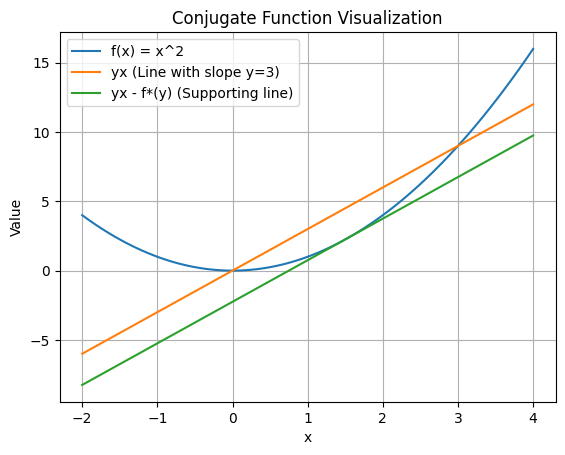

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_conjugate():
    # 原函数 f(x) = x^2
    x = np.linspace(-2, 4, 100)
    f_x = x**2
    
    # 给定斜率 y = 3
    y = 3
    # 线性部分 yx
    linear_part = y * x
    # 差距函数 gap(x) = yx - f(x)
    gap = linear_part - f_x
    
    # 找到最大差距
    max_idx = np.argmax(gap)
    x_opt = x[max_idx]
    f_star_val = gap[max_idx]
    
    # 绘图逻辑 (伪代码描述)
    # Plot 1: f(x)
    plt.plot(x, f_x, label='f(x) = x^2')
    # Plot 2: y-x (直线)
    plt.plot(x, linear_part, label='yx (Line with slope y=3)')
    # Plot 3: y-x - f*(y) (支撑直线)
    plt.plot(x, linear_part - f_star_val, label='yx - f*(y) (Supporting line)')
    # 支撑直线与 f(x) 在 x_opt 处相切
    print(f"Slope y={y}, Optimal x={x_opt:.2f}")
    print(f"Conjugate value f*(y) = {f_star_val:.2f}")
    print(f"Theory: f*(y) = y^2/4 = {3**2/4}")

    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Value')
    plt.title('Conjugate Function Visualization')
    plt.grid()
    plt.show()

visualize_conjugate()

LSE Convexity Check: 2.4741 <= 2.7201 ? True


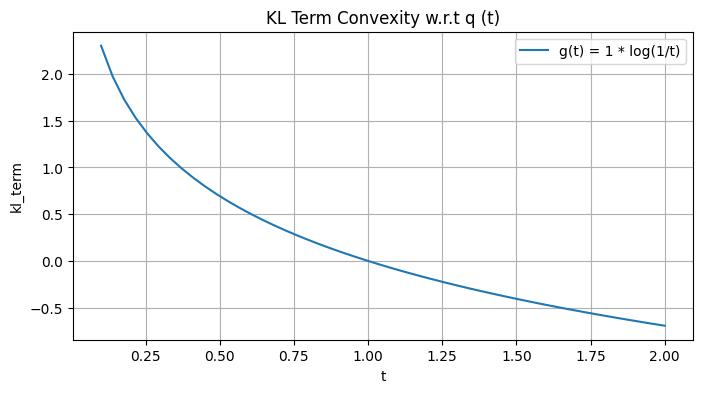

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def verify_lse_convexity():
    """验证 Log-Sum-Exp 的凸性不等式"""
    x = np.array([1.0, 2.0])
    y = np.array([3.0, 1.0])
    theta = 0.5
    
    # f(theta*x + (1-theta)y)
    lhs_input = theta * x + (1 - theta) * y
    lhs = np.log(np.sum(np.exp(lhs_input)))
    
    # theta*f(x) + (1-theta)f(y)
    rhs = theta * np.log(np.sum(np.exp(x))) + (1 - theta) * np.log(np.sum(np.exp(y)))
    
    print(f"LSE Convexity Check: {lhs:.4f} <= {rhs:.4f} ? {lhs <= rhs}")

def visualize_perspective_kl():
    """可视化 x log(x/t) 的凸性 (KL散度核心项)"""
    # 固定 x=1, 变化 t (看 KL 对 q 的凸性)
    t = np.linspace(0.1, 2.0, 50)
    x_val = 1.0
    kl_term = x_val * np.log(x_val / t) # = -log(t)
    
    plt.figure(figsize=(8, 4))
    plt.plot(t, kl_term, label='g(t) = 1 * log(1/t)')
    plt.xlabel("t")
    plt.ylabel("kl_term")
    plt.legend()
    plt.title("KL Term Convexity w.r.t q (t)")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    verify_lse_convexity()
    visualize_perspective_kl()

^^ 上图1️阶导数为负，而二阶导数可以看出为正（下降速度减缓），因此该函数是凸的。

几何直觉：这也是“碗”虽然这个函数一直在下降，看起来不像一个完整的“碗”（没有另一半上升的部分），但它依然是**“碗壁”的一部分**。

弦判定法 (Chord Test)：如果在蓝线上任意取两点连一条直线（红线）：
- 会发现蓝色的曲线永远在红色虚线的下方。
- 这就是凸函数的定义：$f(\theta x + (1-\theta)y) \le \theta f(x) + (1-\theta)f(y)$。

AI 训练的直觉 (Loss Landscape)：在图中看到的这个形状（凸的），对于训练神经网络至关重要：
- 假设 $t$ 是的模型预测值（分母）。
- 当 $t$ 很小（偏离目标）时，梯度（斜率）非常大 $\to$ 强力纠错。
- 当 $t$ 变大（接近目标）时，梯度迅速变小 $\to$ 微调收敛。
- 最重要的是，它是凸的，这意味着梯度下降不会卡在某个奇怪的“局部波峰”上，它会一直顺滑地滑到底部。



## 3.7 拟凸函数 (Quasiconvex Functions)

这一部分的重点在于：很多函数虽然不是标准的“凸函数”，但它们保留了凸函数最关键的性质（如下水平集是凸集），因此依然可以被高效优化。
### 3.7.1 拟凸函数 (Quasiconvex Functions)
#### 定义 (Definition)

函数 $f: \mathbf{R}^n \to \mathbf{R}$ 被称为 拟凸函数 (Quasiconvex)，如果它的定义域 $\mathbf{dom} f$ 是凸集，且对于任意实数 $\alpha$，其 下水平集 (Sublevel sets)：$$S_\alpha = \{x \in \mathbf{dom} f \mid f(x) \le \alpha\}$$都是 凸集。

- 拟凹 (Quasiconcave): 如果 $-f$ 是拟凸的（即上水平集 $\{x \mid f(x) \ge \alpha\}$ 是凸集）。
- 拟线性 (Quasilinear): 既是拟凸又是拟凹的（即其等值线是凸集）。

#### 数学判定不等式 (The Inequality)

$f$ 是拟凸函数 $\iff$ 对于任意 $x, y \in \mathbf{dom} f$ 和 $0 \le \theta \le 1$：$$f(\theta x + (1-\theta)y) \le \max \{f(x), f(y)\}$$

Note： 凸性是对于任意 $x, y \in \mathbf{dom} f$ 和任意 $0 \le \theta \le 1$，满足：$$f(\theta x + (1-\theta)y) \le \theta f(x) + (1-\theta)f(y)$$

直觉解释:

- 路径连通性: 如果在函数图像上取两点，这两点中较高的那一点决定了“水位线”。函数在这两点之间的路径上，永远不会高过这个水位线。

- 单峰性 (Unimodality): 在一维情况下，拟凸函数通常表现为“先降后升”或者单调。它允许底部是平的，但决不允许中间突起一个“驼峰”（那是局部极大值，会破坏下水平集的凸性）。

#### **拟凸函数的例子**
---
例 1: 绝对值的根号$$f(x) = \sqrt{|x|}$$

分析:
- 它的二阶导数在某些地方小于0，所以不是凸函数。
- 但是，画一条水平线 $\alpha$，所有满足 $\sqrt{|x|} \le \alpha$ 的点形成区间 $[-\alpha^2, \alpha^2]$，这是一个凸集。
- 结论: 它是拟凸函数。
---
例 2: 线性分式函数 (Linear-fractional function)$$f(x) = \frac{a^T x + b}{c^T x + d}, \quad \mathbf{dom} f = \{x \mid c^T x + d > 0\}$$

- 直觉: 线性函数除以线性函数。
- 证明:我们要看 $S_\alpha = \{x \mid \frac{a^T x + b}{c^T x + d} \le \alpha\}$ 是否为凸集。因为 $c^T x + d > 0$，不等式可以移项：
$$a^T x + b \le \alpha (c^T x + d)$$
$$(a - \alpha c)^T x + (b - \alpha d) \le 0$$
这是一个线性不等式（半空间）。半空间显然是凸集。
- 结论: 线性分式函数既是拟凸的，也是拟凹的（Quasilinear）。
---

**可微拟凸函数的性质 (Properties)**

如果 $f$ 是可微的，拟凸性有两个重要推论：
- 一阶条件:$$f(y) \le f(x) \implies \nabla f(x)^T (y - x) \le 0$$
    - 直觉: 如果 $y$ 的函数值比 $x$ 小（即 $y$ 在“山坡”下方），那么梯度 $\nabla f(x)$（指向函数增长最快的方向）与方向 $y-x$ 之间的夹角必须是钝角（或直角）。梯度就像是一堵墙，挡住了去往低处的路。
- 二阶条件: 如果 $y^T \nabla f(x) = 0$（即在切线方向上），则 $y^T \nabla^2 f(x) y > 0$（在这个切线方向上必须向上弯曲）。

### 3.7.2 对数凹/凸函数 (Log-concave/convex Functions)
#### 定义

函数 $f: \mathbf{R}^n \to \mathbf{R}$ 其中 $f(x) > 0$  当$\log f(x)$ 是凹函数时，$f$是对数凹 (Log-concave)

- 数学形式:

$f$ 是对数凹的，当且仅当 $\mathbf{dom} f$ 是凸集，且对于任意 $x, y \in \mathbf{dom} f$ 和 $0 < \theta < 1$，满足：$$\log f(\theta x + (1-\theta)y) \ge \theta \log f(x) + (1-\theta) \log f(y)$$或者写成无对数形式（两边取指数 $e^{(\cdot)}$）：$$f(\theta x + (1-\theta)y) \ge f(x)^\theta f(y)^{1-\theta}$$

- 对数凸 (Log-convex): 如果 $\log f(x)$ 是凸函数。

**几何直觉:**
- 左边：$f(\theta x + (1-\theta)y)$ 是中间点的函数值。
- 右边：$f(x)^\theta f(y)^{1-\theta}$ 是函数值的 几何加权平均 (Geometric Mean)。
- 形状: 对数凹函数的图像通常像一个“钟形” (Bell Shape)，两端迅速衰减。
- 结论: 对数凹意味着“中间点的函数值” $\ge$ “两端函数值的几何平均”。
- 包含关系:
    - 如果 $f$ 是对数凹的 $\implies$ $f$ 是拟凹的 (Quasiconcave)。
    - 如果 $f$ 是对数凸的 $\implies$ $f$ 是凸函数。
- 对数凸 (Log-convex): 如果 $\log f(x)$ 是凸函数。$$f(\theta x + (1-\theta)y) \le f(x)^\theta f(y)^{1-\theta}$$
即：函数值的算术平均（隐含在凸性里）比几何平均更有压倒性，或者更直观地，它比指数增长还要快。

#### 判定性质 (Properties)

**二阶条件 (Second-order Condition)**
如果 $f$ 是二阶可微的，我们可以直接对 $\log f(x)$ 求 Hessian 来判定。令 $g(x) = \log f(x)$。
$$\nabla g(x) = \frac{\nabla f(x)}{f(x)}$$
$$\nabla^2 g(x) = \frac{1}{f(x)} \nabla^2 f(x) - \frac{1}{f(x)^2} \nabla f(x) \nabla f(x)^T$$
结论: $f$ 是对数凹的 $\iff$ $\nabla^2 g(x) \preceq 0$。即对于任意 $x \in \mathbf{dom} f$：$$f(x) \nabla^2 f(x) \preceq \nabla f(x) \nabla f(x)^T$$


**包含关系**
- 对数凸 $\implies$ 凸函数。证明：$f$ 对数凸 $\implies \log f$ 凸 $\implies f = e^{\log f}$。因为 $e^u$ 是凸且增的，由复合规则（凸增+凸），$f$ 必为凸。
- 对数凹 $\implies$ 拟凹函数 (Quasiconcave)。上水平集 (Superlevel Sets $S_\alpha = \{x \mid f(x) \ge \alpha\}$ )是凸的（想象成倒扣的碗 在$\alpha$高度水平切一刀，截面一定是类似椭圆/圆的凸集，没有缺口或凹陷），它比一般的拟凹函数性质更好（它是单峰的 unimodal，且没有平坦区域）。


#### 运算与积分

**乘积与求和乘积**: 
- 如果 $f, g$ 是对数凹的 $\implies$ $f(x)g(x)$ 也是对数凹的。
- 推导: $\log(fg) = \log f + \log g$。两个凹函数的和还是凹函数。
- 直觉: 两个高斯分布乘起来，还是一个高斯分布（形状）。
- ***求和***: ***对数凹函数的和通常不是对数凹的***（反例：两个相距很远的高斯分布加起来是双峰的，非对数凹）。

**积分**:
Prekopa-Leindler 不等式的推论

- 定理: 如果 $f(x, y)$ 是关于 $(x, y)$ 的对数凹函数，那么对部分变量积分后的边缘函数：$$g(x) = \int f(x, y) dy$$依然是对数凹函数。
- 应用:卷积 (Convolution): 如果 $f, g$ 是对数凹的，则卷积 $(f * g)(x) = \int f(x-y)g(y) dy$ 是对数凹的。
- 边缘分布: 高斯分布的边缘分布依然是高斯分布。

#### 例子
---
1. 高斯密度 (Gaussian)

$$f(x) \propto e^{-\frac{1}{2}x^T \Sigma^{-1} x}$$
- $\log f(x) = -\frac{1}{2}x^T \Sigma^{-1} x + C$。
- 这是一个凹二次函数。
- 结论: 高斯分布是对数凹的。

2. 伽马函数 (Gamma Function)

$$\Gamma(x) = \int_0^\infty u^{x-1} e^{-u} du$$
- 被积函数 $h(u, x) = u^{x-1} e^{-u}$。
- 取对数: $\log h(u, x) = (x-1)\log u - u$。这是关于 $(u, x)$ 的凹函数（对 $x$ 线性，对 $u$ 凹）。
- 根据积分性质对 $u$ 积分后，$\Gamma(x)$ 必然是对数凹的。
- 结论: $\log \Gamma(x)$ 是凹函数 (对于 $x \ge 1$)。

3. 累积分布函数 CDF

多对数凹概率密度函数 (PDF) 的累积分布函数 (CDF) 也是对数凹的。$$F(x) = \int_{-\infty}^x p(t) dt = \int_{-\infty}^\infty p(t) \cdot \mathbf{1}(t \le x) dt$$

- $p(t)$ 是对数凹。
- 指示函数 $\mathbf{1}(t \le x)$ 是对数凹的（取对数后是 $0$ 或 $-\infty$，这形成一个半空间的凹函数）。
- 结论: 高斯分布的 CDF $\Phi(x)$ 是对数凹的。

---

**总结**

**凸函数世界 (Bowl Shapes)**:
- 强凸函数：对数凸函数 (Log-convex) —— 如 $e^{x^2}$. 增长速度极快。即使取了对数（$\log$ 有压缩数据的能力），它依然是凸的 ($x^2$)。
- 普通凸函数 (Convex) —— 如 $x^2$ (它是凸的，但不是对数凸的, 取对数后 二阶导不一定> 0)
- 拟凸函数 (Quasiconvex) —— 如 $\sqrt{|x|}$（下水平集Sublevel Sets 是凸集， 想象注水到$\alpha$, 水下x都是连在一起没有“孤岛”）

**凹函数世界 (Bell/Hill Shapes)**:
- 强凹函数 (Concave) —— 如 $-x^2$
- 对数凹函数 (Log-concave) —— 如 $e^{-x^2}$ (高斯)。高斯分布是 Log-concave，但原函数不是 Concave（它有拐点）。 必须是**“瘦尾” (Light-tailed)** 的单峰函数
- 拟凹函数 (Quasiconcave) —— 如钟形曲线(只要切片是凸集就行。 只要不凹下去就行，平着也可以)。
> 对数凹函数和拟凹函数判定直觉： 对数凹函数 必须是**“瘦尾” (Light-tailed)** 的单峰函数。如果尾巴太肥（下降比指数慢），它就只是拟凹，而不是对数凹。


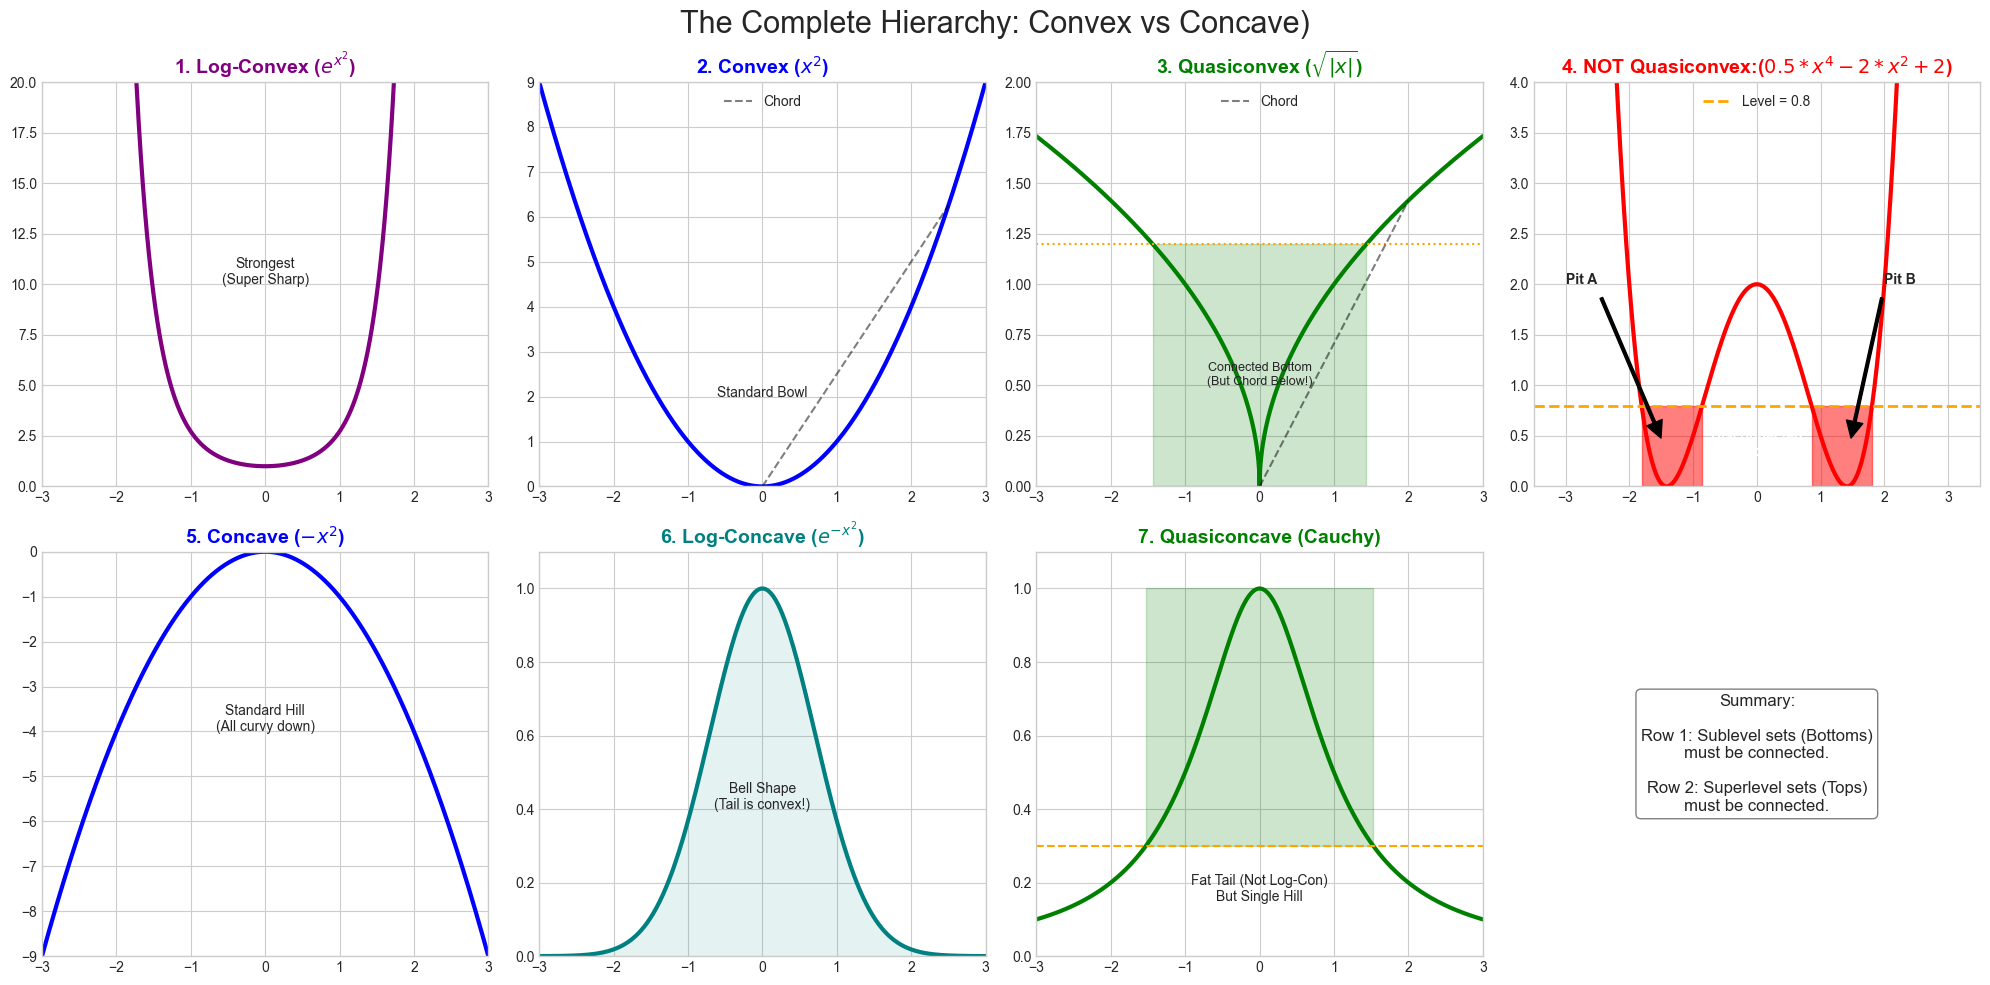

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 设置绘图风格
plt.style.use('seaborn-v0_8-whitegrid')

def plot_seven_functions_improved_w():
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle("The Complete Hierarchy: Convex vs Concave)", fontsize=22, y=0.98)
    
    x = np.linspace(-3.5, 3.5, 1001)

    
    # ========================== ROW 1: CONVEX WORLD ==========================
    
    # 1. Log-Convex (e^x^2)
    ax1 = plt.subplot(2, 4, 1)
    y1 = np.exp(x**2)
    mask1 = y1 < 100 # 限制显示范围
    ax1.plot(x[mask1], y1[mask1], 'purple', linewidth=3)
    ax1.set_title(r"1. Log-Convex ($e^{x^2}$)", fontsize=14, fontweight='bold', color='purple')
    ax1.text(0, 10, "Strongest\n(Super Sharp)", ha='center')
    ax1.set_ylim(0, 20)
    ax1.set_xlim(-3, 3)

    # 2. Strictly Convex (x^2)
    ax2 = plt.subplot(2, 4, 2)
    y2 = x**2
    ax2.plot(x, y2, 'b', linewidth=3)
    ax2.set_title(r"2. Convex ($x^2$)", fontsize=14, fontweight='bold', color='blue')
    ax2.plot([0, 2.5], [0, 6.25], 'k--', alpha=0.5, label='Chord') # 弦
    ax2.text(0, 2, "Standard Bowl", ha='center')
    ax2.legend(loc='upper center')
    ax2.set_xlim(-3, 3)
    ax2.set_ylim(0, 9)

    # 3. Quasiconvex (sqrt(|x|))
    ax3 = plt.subplot(2, 4, 3)
    y3 = np.sqrt(np.abs(x))
    ax3.plot(x, y3, 'g', linewidth=3)
    ax3.set_title(r"3. Quasiconvex ($\sqrt{|x|}$)", fontsize=14, fontweight='bold', color='green')
    # 演示下水平集连通
    level3 = 1.2
    ax3.axhline(level3, color='orange', linestyle=':')
    ax3.fill_between(x, 0, level3, where=(y3<=level3), color='green', alpha=0.2)
    ax3.text(0, 0.5, "Connected Bottom\n(But Chord Below!)", ha='center', fontsize=9)
    ax3.plot([0, 2], [0, np.sqrt(2)], 'k--', alpha=0.5, label='Chord') # 弦
    ax3.legend(loc='upper center')
    ax3.set_xlim(-3, 3)
    ax3.set_ylim(0, 2)

    # 4. NOT Quasiconvex
    ax4 = plt.subplot(2, 4, 4)
    # 函数：0.5*x^4 - 2*x^2 + 2
    # 特征：中间峰值高(2)，两侧谷底深(0)
    y4 = 0.5 * x**4 - 2 * x**2 + 2
    ax4.plot(x, y4, 'r', linewidth=3)
    ax4.set_title(r"4. NOT Quasiconvex:($0.5*x^4 - 2*x^2 + 2$)", fontsize=14, fontweight='bold', color='red')
    
    # 演示底部断开
    # 选择一条切开中间山峰的水位线，例如 0.8
    level4 = 0.8
    ax4.axhline(level4, color='orange', linestyle='--', linewidth=2, label=f'Level = {level4}')
    
    # 填充下水平集，明显看到是断开的
    ax4.fill_between(x, 0, level4, where=(y4<=level4), color='red', alpha=0.5)
    
    # 添加文字说明和箭头，指向断开的两个坑
    ax4.text(0, 0.3, "Disconnected\nBottoms!", ha='center', color='white', fontweight='bold')
    ax4.annotate('Pit A', xy=(-1.45, 0.4), xytext=(-3, 2), 
                 arrowprops=dict(facecolor='black', shrink=0.05, width=2), fontsize=10, fontweight='bold')
    ax4.annotate('Pit B', xy=(1.45, 0.4), xytext=(2, 2), 
                 arrowprops=dict(facecolor='black', shrink=0.05, width=2), fontsize=10, fontweight='bold')
    
    ax4.set_ylim(0, 4)
    ax4.set_xlim(-3.5, 3.5)
    ax4.legend(loc='upper center')

    # ========================== ROW 2: CONCAVE WORLD ==========================
    
    # 5. Concave (-x^2)
    ax5 = plt.subplot(2, 4, 5)
    y5 = -x**2
    ax5.plot(x, y5, 'b', linewidth=3)
    ax5.set_title(r"5. Concave ($-x^2$)", fontsize=14, fontweight='bold', color='blue')
    ax5.text(0, -4, "Standard Hill\n(All curvy down)", ha='center')
    ax5.set_xlim(-3, 3)
    ax5.set_ylim(-9, 0)

    # 6. Log-Concave (Gaussian)
    ax6 = plt.subplot(2, 4, 6)
    y6 = np.exp(-x**2)
    ax6.plot(x, y6, 'teal', linewidth=3)
    ax6.set_title(r"6. Log-Concave ($e^{-x^2}$)", fontsize=14, fontweight='bold', color='teal')
    ax6.fill_between(x, 0, y6, color='teal', alpha=0.1)
    ax6.text(0, 0.4, "Bell Shape\n(Tail is convex!)", ha='center')
    ax6.set_xlim(-3, 3)
    ax6.set_ylim(0, 1.1)

    # 7. Quasiconcave (Cauchy)
    ax7 = plt.subplot(2, 4, 7)
    y7 = 1 / (1 + x**2)
    ax7.plot(x, y7, 'g', linewidth=3, label='Cauchy')
    ax7.set_title(r"7. Quasiconcave (Cauchy)", fontsize=14, fontweight='bold', color='green')
    # 演示上水平集连通
    level7 = 0.3
    ax7.axhline(level7, color='orange', linestyle='--')
    ax7.fill_between(x, level7, 1.0, where=(y7>=level7), color='green', alpha=0.2)
    ax7.text(0, 0.15, "Fat Tail (Not Log-Con)\nBut Single Hill", ha='center')
    ax7.set_xlim(-3, 3)
    ax7.set_ylim(0, 1.1)
    
    # 删除第8个图
    ax8 = plt.subplot(2, 4, 8)
    ax8.axis('off')
    ax8.text(0.5, 0.5, "Summary:\n\nRow 1: Sublevel sets (Bottoms)\nmust be connected.\n\nRow 2: Superlevel sets (Tops)\nmust be connected.", 
             ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", fc="w", ec="gray"))

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_seven_functions_improved_w()